# Introduction to Probability Theory

## Less math, more programming

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### In the cell below we are generating what are known as "Uniform Samples".  This can be thought of as "clean" data.  Often when sending data into ML applications such as "The Learning of Simplicies", the efficiency is often directly related to uniformity.  Efficiency can be defined by both accurancy and speed.  In higher dimensional geometry we will focus on accuracy, but often we only care if algorithms run in polynomial-time with respect to the dimension.
---
#### `np.random.uniform(min, max, (dimension, number of samples)`
#### Try changing the number of samples in the cell below by changing the value of `N`

In [6]:
d = 2
N = 1000
uniform_samples = np.random.uniform(0,1,(d,N))

### Below we see our data is in a dxN matrix

In [7]:
print(uniform_samples)

[[0.14429765 0.20198972 0.18163983 ... 0.52084702 0.46435167 0.66762026]
 [0.57390372 0.56961682 0.35998681 ... 0.57007953 0.69155905 0.9243512 ]]


#### `plt.scatter(x, y)`
#### `uniform_samples[0,:]` gets the first row of the matrix and every column
#### `uniform_samples[1,:]` gets the second row of the matix and every column

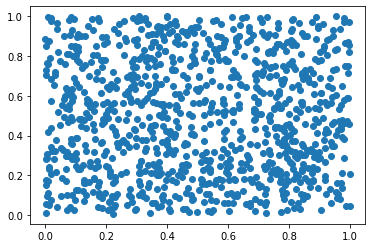

In [8]:
plt.scatter(uniform_samples[0,:], uniform_samples[1,:]);

### If we histogram the x coordinates of the samples we get back roughly what is the uniform "pdf"

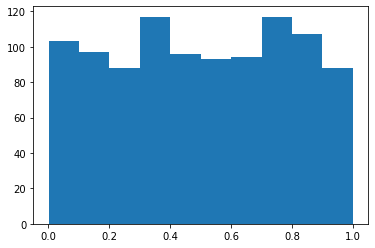

In [9]:
plt.hist(uniform_samples[0,:]);

### A Probability Density Function or 'pdf' can be defined as the probability of the event occuring 

In [10]:
x = np.arange(-.25,1.25,.001)
y = [1 if element >= 0 and element <= 1 else 0 for element in x]

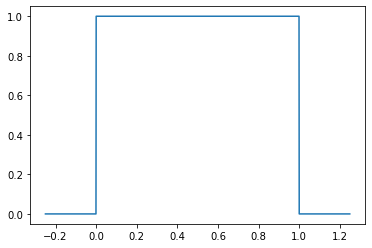

In [11]:
plt.plot(x, y);

In [12]:
from oct2py import octave
from itertools import permutations, product

In [13]:
def plusAndMinusPermutations(items):
    for p in permutations(items):
        for signs in product([-1,1], repeat=len(items)):
            yield [a*sign for a,sign in zip(p,signs)]

def Frobenius_Norm(A, A_):
    return np.sqrt(np.trace(np.subtract(A, A_)@np.subtract(A,A_).conj().T))
octave.addpath('~/Github/NSF-Phase1/Blaine/fastica');

In [14]:
def Get_Min(A,A_):
    weights = -abs((A.T@A_)**2)
    ind = octave.munkres(weights)
    print(ind)
    fs = [int(x) - 1 for x in list(ind[0])]
    B = A_[:, fs]
    innerprod = np.diag(np.real(A.T@B) < 0)
    B[:,innerprod] = -B[:, innerprod]
    min_ = Frobenius_Norm(B, A)
    return min_ 


def ell_1(n):
    U = np.random.uniform(0,1,n)
    tmp = np.array([0,1])
    Final = np.zeros(n)
    U = np.hstack((U,tmp))
    U = np.sort(U)
    for i in range(1,n+1):
        Final[i-1] = U[i] - U[i-1]
    Final = np.reshape(Final, (n,1))
    for j in range(n):
        binom = np.random.binomial(1,.5)
        if(binom == 1):
            Final[j] = Final[j]*(-1)
    return Final

def simplex(n):
    U = np.random.uniform(0,1,n)
    tmp = np.array([0,1])
    Final = np.zeros(n)
    U = np.hstack((U,tmp))
    U = np.sort(U)
    for i in range(1,n+1):
        Final[i-1] = U[i] - U[i-1]
    Final = np.reshape(Final, (n,1))
    return Final

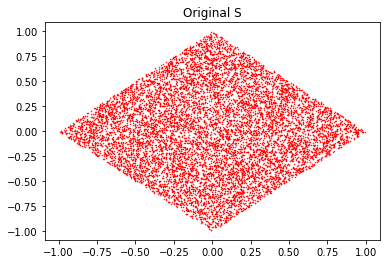

In [15]:
samples = 10000

n = 2
S = np.zeros((n, 1))

#Uniform samples from the n-dimensional simplex 
for i in range(samples):
    S = np.hstack((S, ell_1(n)))
S = np.delete(S, 0,1)


plt.plot(S[0,:], S[1,:], "or", markersize = 0.5)
plt.title("Original S")
plt.show()

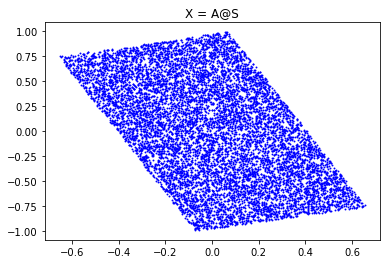

In [16]:
A = np.random.normal(0,1,(n,n))

#Computing the repmat
sqrt = np.sqrt(np.sum(A**2, axis = 0))
A = A  / (np.tile(sqrt,(n,1)))

X = A@S

plt.plot(X[0,:], X[1, :], "ob", markersize = .9)
plt.title("X = A@S")
plt.show()

In [19]:
T = np.random.gamma(((X.shape[0]) / 1) + 1, 1, (1, X.shape[1]))
Q = X * np.tile(T ** (1 / 1), (X.shape[0], 1))

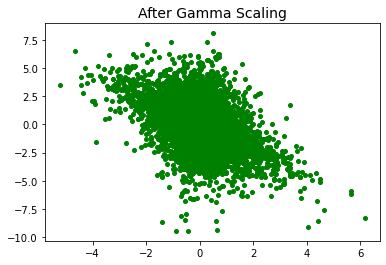

In [20]:
plt.plot(Q[0,:], Q[1, :], "og", markersize = 4)
plt.title("After Gamma Scaling", fontsize=14)
plt.show()

In [21]:
M_til = octave.o2pfastica(Q)
A_til = np.copy(M_til)
B_til = A_til@S

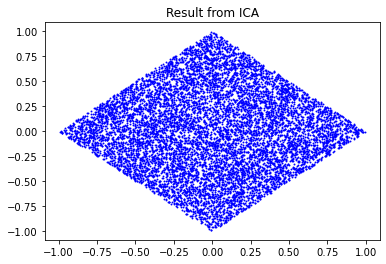

In [23]:
temp = np.linalg.inv(A_til)@B_til
plt.plot(temp[0,:], temp[1,:], "ob", markersize = 0.9)
plt.title("Result from ICA")
plt.show()

In [26]:
Get_Min(A, A_til)

[[2. 1.]]


0.011193752029218232

In [28]:
print("Estimated A")
print(A_til)
print("Original A")
print(A)

Estimated A
[[-0.65858116  0.08147825]
 [ 0.7525097   0.99667512]]
Original A
[[-0.07053595  0.66024027]
 [-0.99750924 -0.75105445]]
